# Bank Customers Churn
https://www.kaggle.com/datasets/santoshd3/bank-customers?resource=download

### Data Preprocessing

In [47]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [49]:
# importing dataset
churn = pd.read_csv("Churn Modeling.csv")

In [50]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [52]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From 'Tenure' we can say that the average time a customer stays within the client base is around 5 years. It's reasonable to figure this variable should have an important role in the task at hand.
From 'Exited' (target) we can say that the churn rate in the dataset is around 20%. Which also tells us that our data is unbalanced.

In [53]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

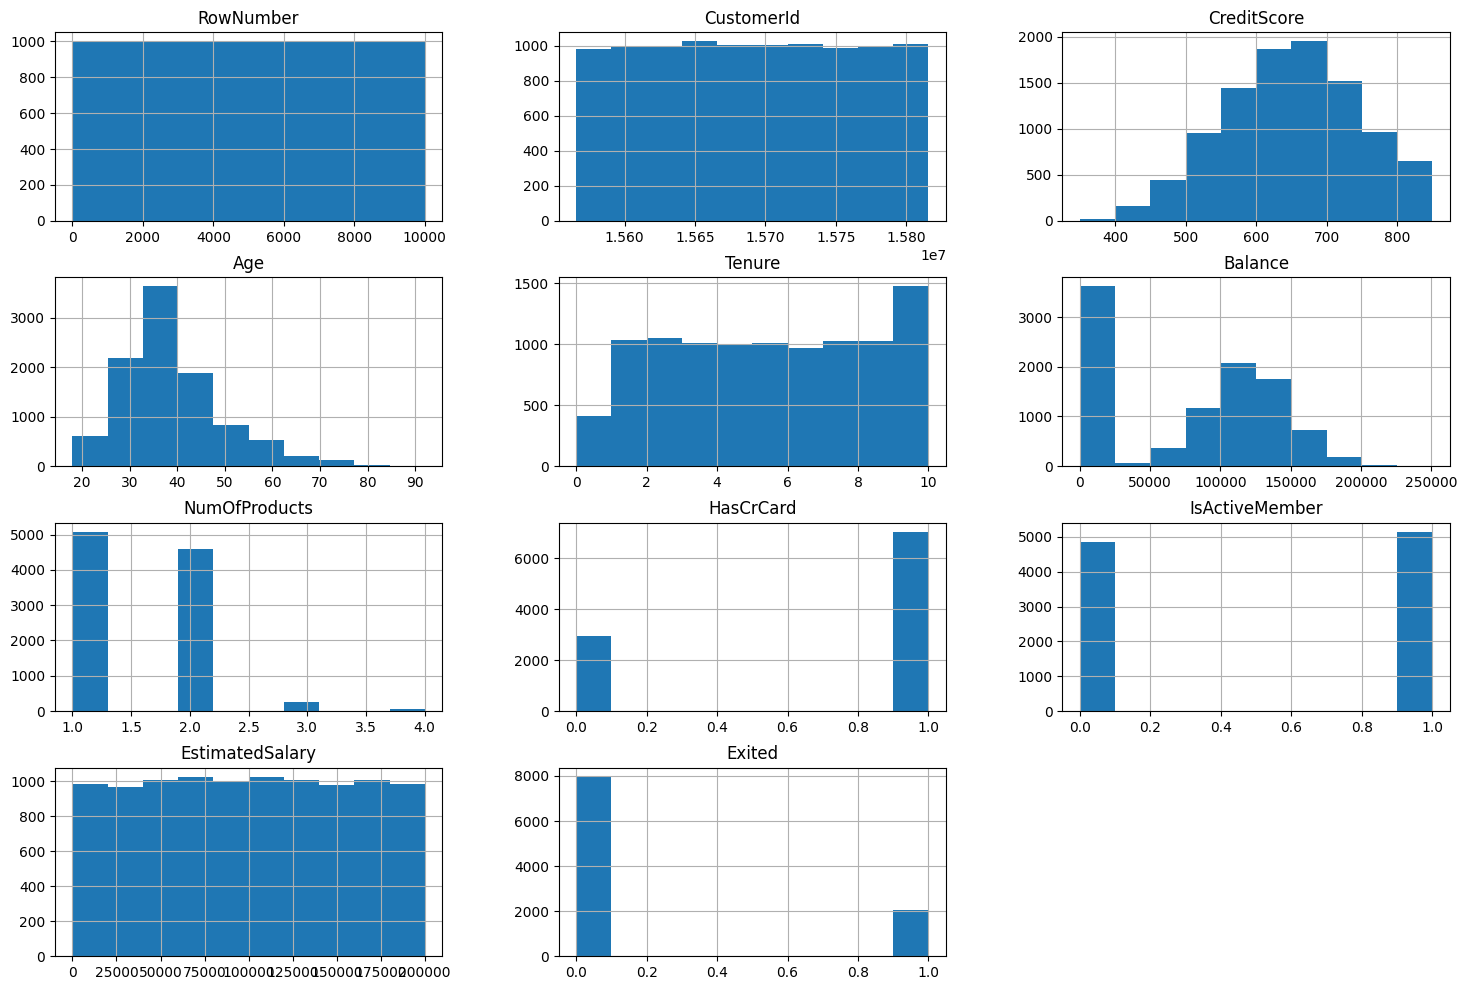

In [54]:
churn.hist(figsize=(18,12))
plt.show()

<AxesSubplot:xlabel='Balance', ylabel='CreditScore'>

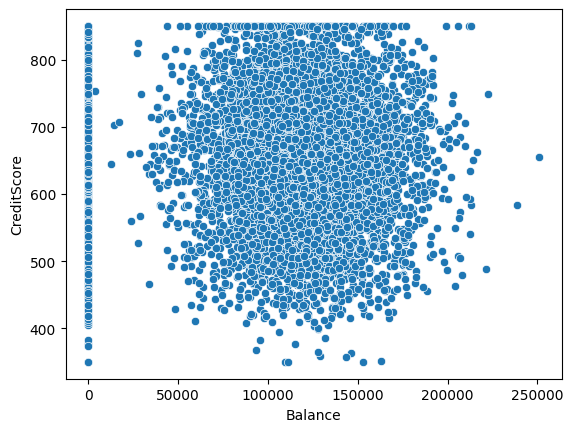

In [55]:
sns.scatterplot(x = 'Balance', y = 'CreditScore', data = churn)

In [56]:
# unique values
for var in churn.columns:
  print('{} has {} unique values, its type is {} and it has {} NaNs'.format(var, churn[var].nunique(), churn[var].dtype, churn[var].isna().sum()))


RowNumber has 10000 unique values, its type is int64 and it has 0 NaNs
CustomerId has 10000 unique values, its type is int64 and it has 0 NaNs
Surname has 2932 unique values, its type is object and it has 0 NaNs
CreditScore has 460 unique values, its type is int64 and it has 0 NaNs
Geography has 3 unique values, its type is object and it has 0 NaNs
Gender has 2 unique values, its type is object and it has 0 NaNs
Age has 70 unique values, its type is int64 and it has 0 NaNs
Tenure has 11 unique values, its type is int64 and it has 0 NaNs
Balance has 6382 unique values, its type is float64 and it has 0 NaNs
NumOfProducts has 4 unique values, its type is int64 and it has 0 NaNs
HasCrCard has 2 unique values, its type is int64 and it has 0 NaNs
IsActiveMember has 2 unique values, its type is int64 and it has 0 NaNs
EstimatedSalary has 9999 unique values, its type is float64 and it has 0 NaNs
Exited has 2 unique values, its type is int64 and it has 0 NaNs


In [57]:
churn.shape

(10000, 14)

So far we can see that this dataset is consistent and "ready to go". We have 10,000 entries and 14 columns, including the target variable.
There are no missing values, nor duplicate rows. 
From this point we can already say that:
    'RowNumber' (as the variable name suggests) is duplicated with the dataset's index. 
    'CustomerId' is an identificator for customers and, by the number of unique values, also acts as an index. 
    'Surname' doesn't hold any meaning for our scope of analysis. So let's drop these 3 variables.

In [58]:
# reconstructing dataset by removing the irrelevant columns such as RowNumber, CustomerId, Surname
X = churn.iloc[:, 3:13]
y = churn.iloc[:, 13]

In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 781.4+ KB


0    0.7963
1    0.2037
Name: Exited, dtype: float64


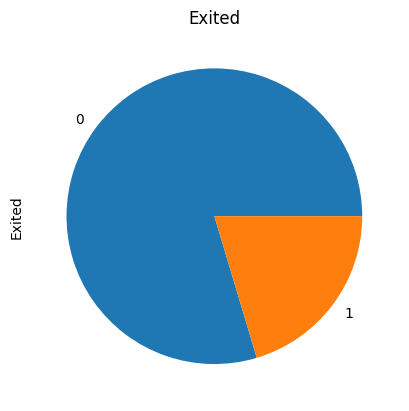

In [63]:
# Target balance check
y.value_counts().plot(kind = 'pie', title = 'Exited')
print(y.value_counts(normalize = True))

In [64]:
# Define lists of categorical and numerical features 
categorical = [var for var in X.columns if X[var].dtype == 'object']
print('there are {} categorical variables'.format(len(categorical)))
print(categorical)

numeric = [var for var in X.columns if X[var].dtype in ('int64', 'float64')]
print('there are {} numeric variables'.format(len(numeric)))
print(numeric)

there are 2 categorical variables
['Geography', 'Gender']
there are 8 numeric variables
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64


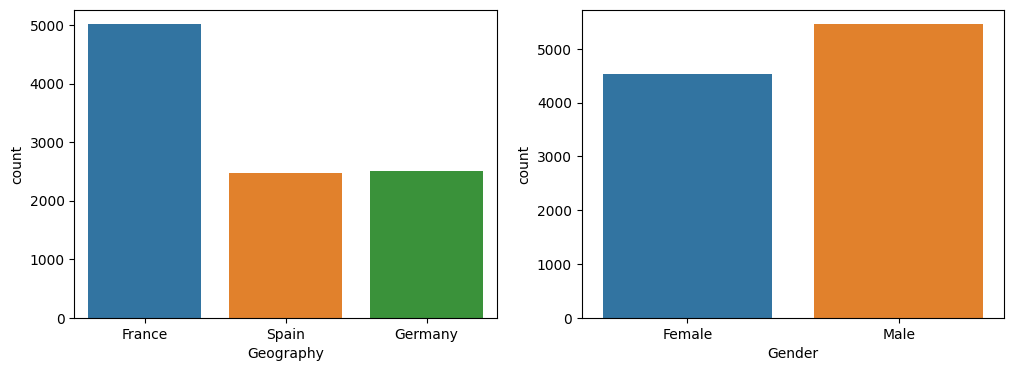

In [67]:
# distribution plots for categorical features
fig, axs = plt.subplots(1, 2, figsize = (12,4))
for i, var in enumerate(categorical):
  sns.countplot(x = var, data = X, ax = axs[i])
  print(X[var].value_counts(normalize = True))

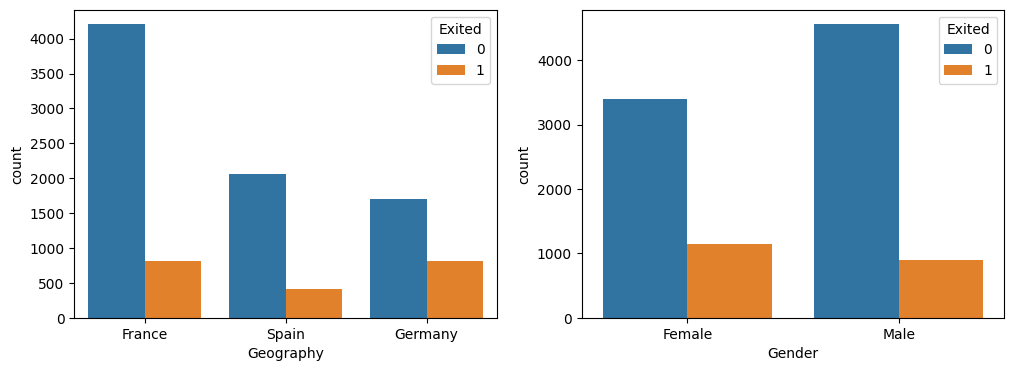

In [69]:
# distribution plots for categorical features grouped by the target
fig, axs = plt.subplots(1, 2, figsize = (12,4))
for i, var in enumerate(categorical):
  sns.countplot(x = var, data = X, ax = axs[i], hue = y)

Half of the customers are from France. The other half is equally divided between Spain and Germany.
Gender shows a slight predominance of males.
When we group by 'exited', it's clear that the proportions of clients who have churned are different: 
    churn rate in germany is the highest among countries. 
    As for gender, female's churn rate are higher than for males.

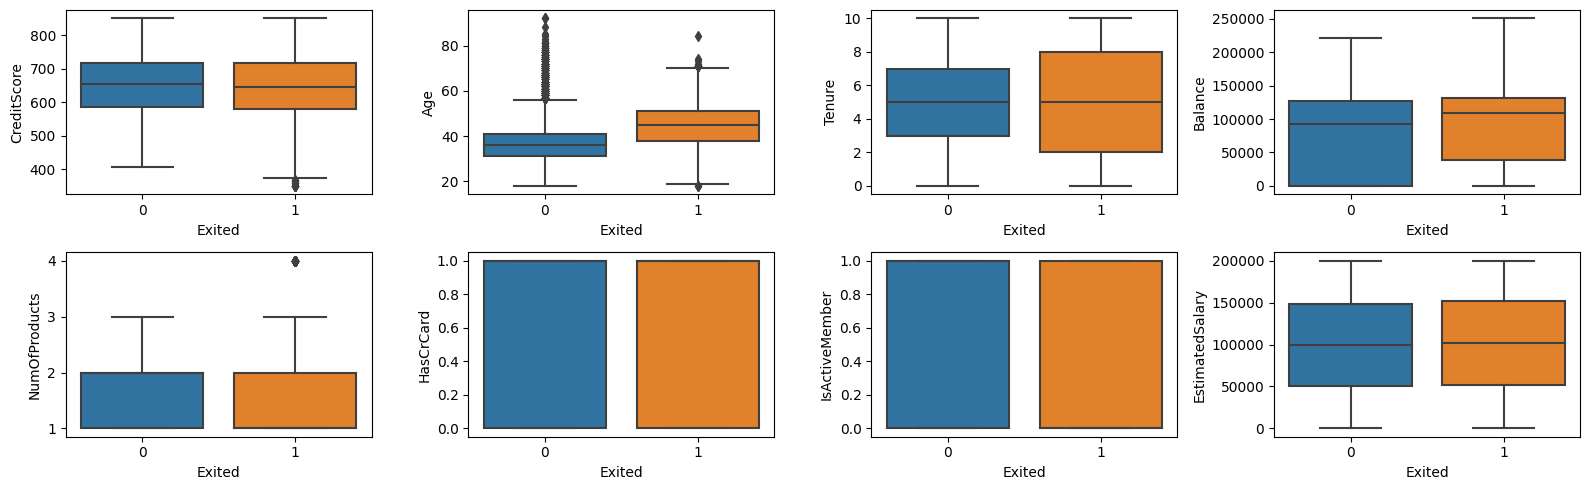

In [72]:
# distribution plots for numerical features
fig, axs = plt.subplots(2, 4, figsize = (16,5))
for i in range(int(len(numeric)/2)):
  sns.boxplot(x = y, y = numeric[i], data = X, ax = axs[0, i])
  #axs[0, i].set_title(num_features[i])
  sns.boxplot(x = y, y = numeric[i+4], data = X, ax = axs[1, i])
  #axs[1, i].set_title(num_features[i+4])
fig.tight_layout()
plt.show()

In [79]:
# converting categorical features into dummy variables
states = pd.get_dummies(X['Geography'],drop_first = True)
gender = pd.get_dummies(X['Gender'],drop_first = True)

In [80]:
# dropping the columns which were converted to dummy variables
X = X.drop(["Geography","Gender"],axis = 1)

In [81]:
# concatenating remaining columns of the dataset with the dummy variables columns
X = pd.concat([X,states,gender],axis = 1)

In [8]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [82]:
# splitting dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [83]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

### Correlation Analysis

In [75]:
# correlation heatmap function
def corr_heatmap(churn, method):
  churn_corr = churn.iloc[:,3:].corr(method = method)
  mask = np.triu(np.ones_like(churn_corr, dtype = np.bool))
  fig, ax = plt.subplots(figsize = (10, 10))
  sns.heatmap(churn_corr, annot = True, vmin = -1, vmax = 1, cmap = 'viridis', linewidths = .5, mask = mask, ax = ax)
  plt.show()

/var/folders/rx/dq92bd594rd72ms3cbzf46cc0000gn/T/ipykernel_27788/41128936.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(churn_corr, dtype = np.bool))


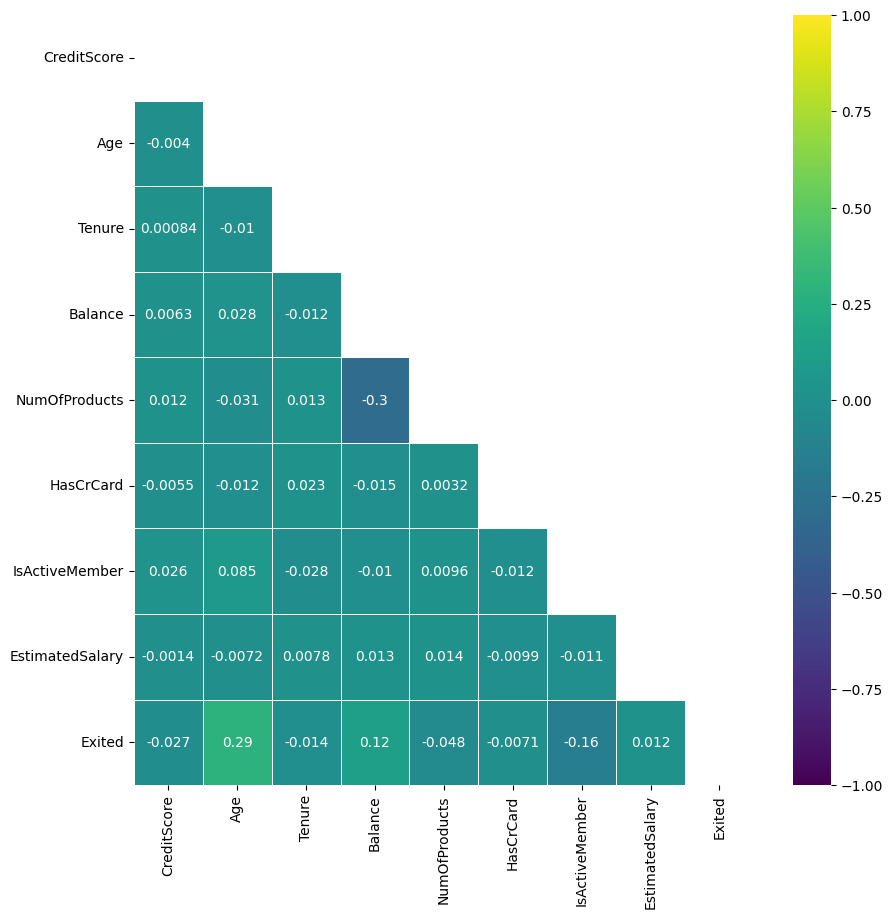

In [76]:
# Pearson Correlation analysis
corr_heatmap(churn, 'pearson')

/var/folders/rx/dq92bd594rd72ms3cbzf46cc0000gn/T/ipykernel_27788/41128936.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(churn_corr, dtype = np.bool))


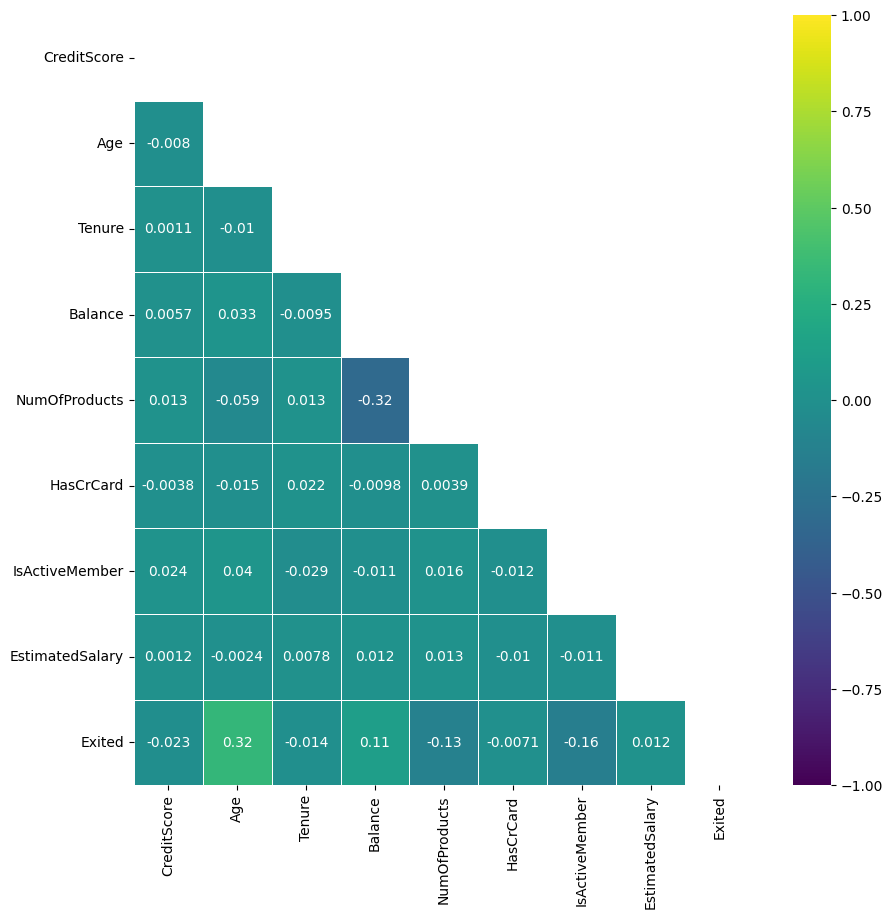

In [77]:
# Pearson Correlation analysis
corr_heatmap(churn, 'spearman')

No variables are too highly correlated to be considered a problem.
The variables with greater correlation to the target are 'Age', 'IsActiveMember', 'NumOfProducts' and 'Balance'.

## Model Building

### 1 ANN

In [11]:
# importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [12]:
# initializing ANN
classifier = Sequential()

2022-06-28 14:59:57.855119: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
# adding input layer and first hidden layer
classifier.add(Dense(activation = "relu", input_dim = 11, units = 6, kernel_initializer = "uniform"))

In [14]:
# adding second hidden layer
classifier.add(Dense(activation = "relu", units = 6, kernel_initializer = "uniform"))

In [15]:
# adding output layer
classifier.add(Dense(activation = "sigmoid", units = 1, kernel_initializer = "uniform"))

In [16]:
# compiling ANN
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [19]:
# fitting ANN to training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4819 - accuracy: 0.7958
Epoch 2/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4264 - accuracy: 0.7960
Epoch 3/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4205 - accuracy: 0.8064
Epoch 4/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4172 - accuracy: 0.8276
Epoch 5/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4155 - accuracy: 0.8291
Epoch 6/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4139 - accuracy: 0.8316
Epoch 7/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4123 - accuracy: 0.8332
Epoch 8/50
800/800 [==============================] - 1s 2ms/step - loss: 0.4109 - accuracy: 0.8332
Epoch 9/50
800/800 [==============================] - 1s 2ms/step - loss: 0.4107 - accuracy: 0.8339
Epoch 10/50
800/800 [==============================] - 1s 2ms/step - loss: 0.4096 - accuracy: 0.8350

### Making prediction and Evaluating model

In [20]:
# predicting test set
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [21]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [22]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [23]:
cm

array([[1541,   54],
       [ 264,  141]])

In [24]:
accuracy

0.841

### 2 Logistic Regression

In [99]:
param_grid_logreg = {'C': [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.1, 1], 'solver': ['liblinear', 'lbfgs']}
print("Parameter grid:\n{}".format(param_grid_logreg))

Parameter grid:
{'C': [1e-09, 1e-08, 1e-07, 1e-06, 0.1, 1], 'solver': ['liblinear', 'lbfgs']}


In [88]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(penalty = 'l2', random_state = 0)
grid_search = GridSearchCV(logreg, param_grid_logreg, cv = 5, n_jobs = -1, scoring = "roc_auc").fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'C': 0.1, 'solver': 'liblinear'}


In [96]:
from sklearn.metrics import roc_auc_score

logreg = LogisticRegression(penalty = 'l2', random_state = 0, C = 0.1, solver = 'liblinear').fit(X_train, y_train)

print('roc_auc_score: {:.4f}'.format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])))

roc_auc_score: 0.7722


In [97]:
#Generating predicted probabilites
logreg_probs = logreg.predict_proba(X_test)
print('AUC: ', roc_auc_score(y_test, logreg_probs[:,1]))
print('Accuracy: ', logreg.score(X_test, y_test))

AUC:  0.7722419598281668
Accuracy:  0.8115


In [92]:
predictions_logreg = logreg_probs[:,1]

### 3 SVC

In [100]:
param_grid_svc = {'C': [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.1, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': (1, 3), 
                 #'gamma': ['scale', 'auto']
                 }
print("Parameter grid:\n{}".format(param_grid_svc))

Parameter grid:
{'C': [1e-09, 1e-08, 1e-07, 1e-06, 0.1, 1], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': (1, 3)}


In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svc = SVC(random_state = 0)
grid_search = GridSearchCV(svc, param_grid_svc, cv = 5, n_jobs = -1, scoring = "roc_auc").fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))

Best parameters: {'C': 1, 'degree': 3, 'kernel': 'poly'}


In [104]:
from sklearn.metrics import roc_auc_score

svc = SVC(random_state = 0, C = 1, kernel = 'poly', degree = 3).fit(X_train, y_train)

print('roc_auc_score: {:.4f}'.format(roc_auc_score(y_test, svc.decision_function(X_test))))

roc_auc_score: 0.8378


In [105]:
#Generating predicted probabilites
svm_probs = svc.decision_function(X_test)
print('AUC: ', roc_auc_score(y_test, svm_probs))
print('Accuracy: ', svc.score(X_test, y_test))

AUC:  0.8378172529896666
Accuracy:  0.857


In [106]:
svm_probs

array([-0.95651244, -0.82689917, -1.15420942, ..., -1.16594112,
       -1.07864454, -1.13464886])

### 4 Random Forest

In [107]:
param_grid_rf = {'max_depth': [1,2,3,4,5],
              'min_samples_leaf': [50,60,70,80,90,100],
              'min_samples_split': [100,150,200,250,300]
             }

In [109]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, max_features = 2, random_state = 0)

grid_rf = GridSearchCV(rf, param_grid_rf, cv = 5, scoring = 'roc_auc', n_jobs = -1)
grid_rf.fit(X_train, y_train)

print("Best parameters: {}".format(grid_rf.best_params_))

Best parameters: {'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 150}


In [110]:
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(random_state = 0, n_estimators = 100, max_features = 2, max_depth = 5, min_samples_leaf = 50, min_samples_split = 150).fit(X_train, y_train)

print('roc_auc_score: {:.4f}'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))

roc_auc_score: 0.8565


In [111]:
#Generating predicted probabilites
rf_probs = rf.predict_proba(X_test)
print('AUC: ', roc_auc_score(y_test, rf_probs[:,1]))
print('Accuracy: ', rf.score(X_test, y_test))

AUC:  0.8565099268547545
Accuracy:  0.8295


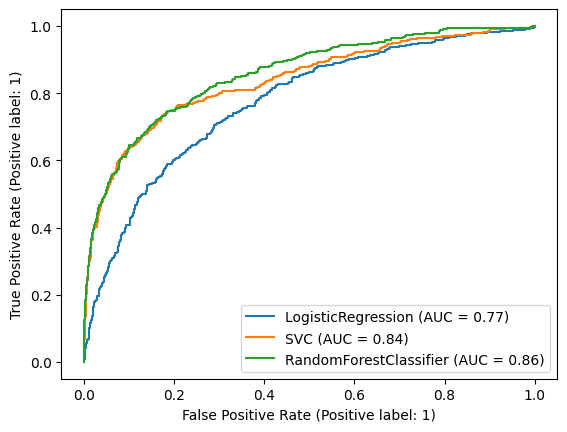

In [114]:
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()
plot_roc_curve(logreg, X_test, y_test, ax=ax)
plot_roc_curve(svc, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)

# Comment

Results show that RandomForest presented the best result. The final selection of the best model is not a task that can be generalized (or shouldn't). It depends on several factors, like what kind of error the application wants to minimize (impacting on which metrics we should focus on), feature importance, model interpretation etc. This last factor is gaining importance nowadays. Big credit companies are choosing a simpler model with worse performance because it was simplier, or more intuitive. The final seleciton definetly should be done with a joint effort of data and domains knowledge specialists.

Generally speaking, AUC of 0.85 is already a satisfactory result, but again, it depends on the application needs and scope. Also, there are a few more steps we could do in order to check if we could improve performance, like feature selection, feature engineering and a mixed strategy of over and under sampling, for example.